In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Analysis on Number of EV's in different States

In [ ]:
ev_count_per_state = pd.read_csv("evs_per_state.csv")
ev_count_per_state.drop([len(ev_count_per_state)-1], axis=0, inplace=True)
ev_count_per_state.drop("Sl. No.", axis=1, inplace=True)
ev_count_per_state = ev_count_per_state.sort_values(["Number of Electric/Hybrid Vehicle (approx.)"], ascending=True)
ev_count_per_state.head()

,State/UT-wise,Number of Electric/Hybrid Vehicle (approx.)
25,Meghalaya,6
22,Manipur,61
23,Nagaland,67
19,Andaman and Nicobar Islands,82
21,Tripura,86


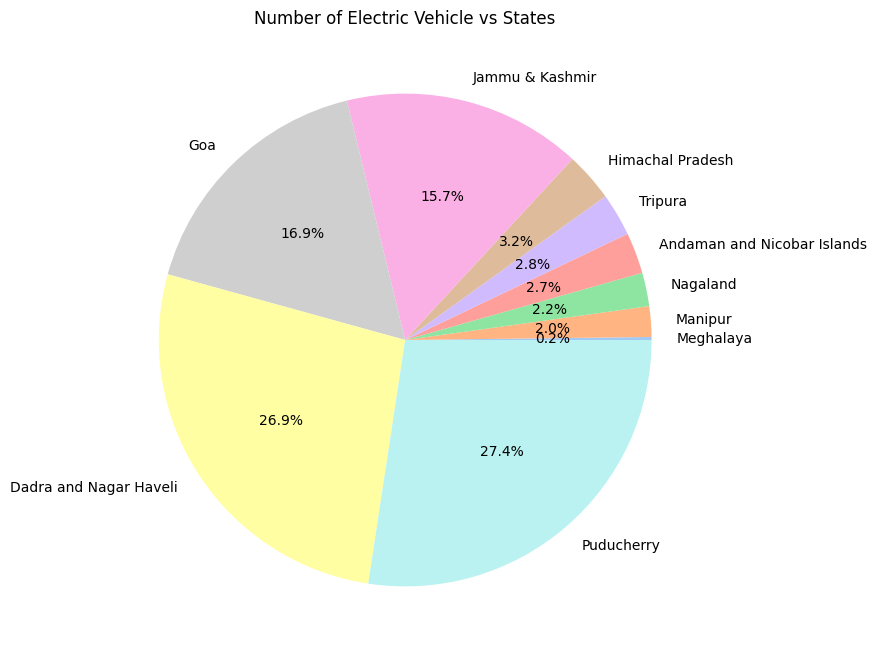

In [ ]:
top_10_count = ev_count_per_state[:10]
colors =sns.color_palette('pastel')
plt.figure(figsize=(8,8))
plt.title("Number of Electric Vehicle vs States")
plt.pie(top_10_count["Number of Electric/Hybrid Vehicle (approx.)"], labels=top_10_count["State/UT-wise"],colors=colors, autopct='%1.1f%%',startangle=0)
plt.show()

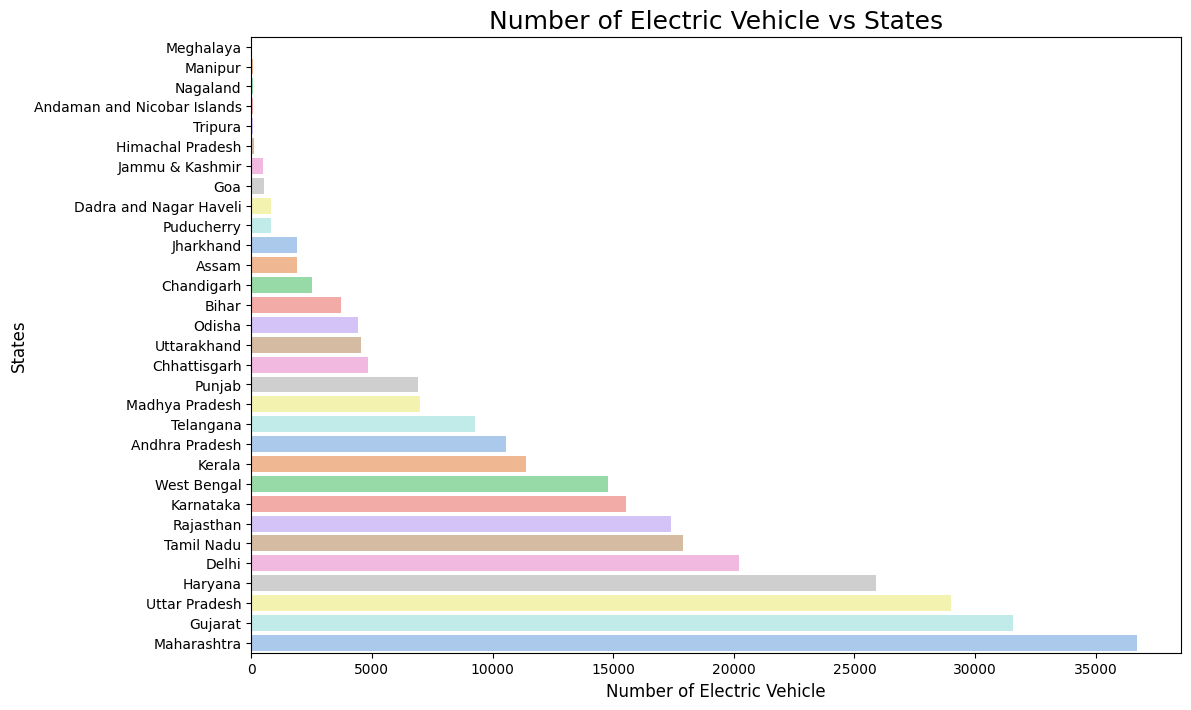

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x="Number of Electric/Hybrid Vehicle (approx.)", y="State/UT-wise",data=ev_count_per_state,palette="pastel")
plt.title("Number of Electric Vehicle vs States", fontsize=18)
plt.xlabel("Number of Electric Vehicle", fontsize=12)
plt.ylabel("States", fontsize=12)
plt.xticks(rotation=0)
plt.show()

# Charging Points throughout Country

In [ ]:
charge_points_per_state = pd.read_csv("charging_points.csv")
charge_points_per_state.drop([len(charge_points_per_state)-1], axis=0, inplace=True)
charge_points_per_state = charge_points_per_state.sort_values(["Number of Electric Vehicle Charging Sanctioned"], ascending=True)
charge_points_per_state.head()

,State/UT-wise,Number of Electric Vehicle Charging Sanctioned
23,Himachal Pradesh,10
21,Uttarakhand,10
22,Puducherry,10
20,Odisha,18
19,Assam,20


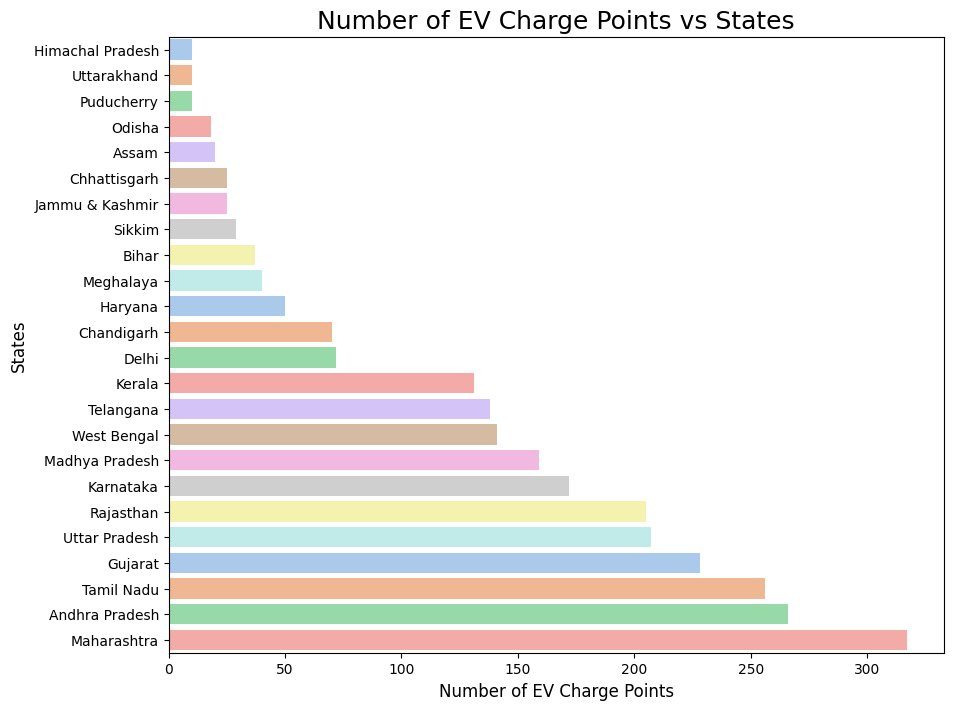

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x="Number of Electric Vehicle Charging Sanctioned",y="State/UT-wise",data=charge_points_per_state,palette="pastel")
plt.title("Number of EV Charge Points vs States", fontsize=18)
plt.xlabel("Number of EV Charge Points", fontsize=12)
plt.ylabel("States", fontsize=12)
plt.xticks(rotation=0)
plt.show()

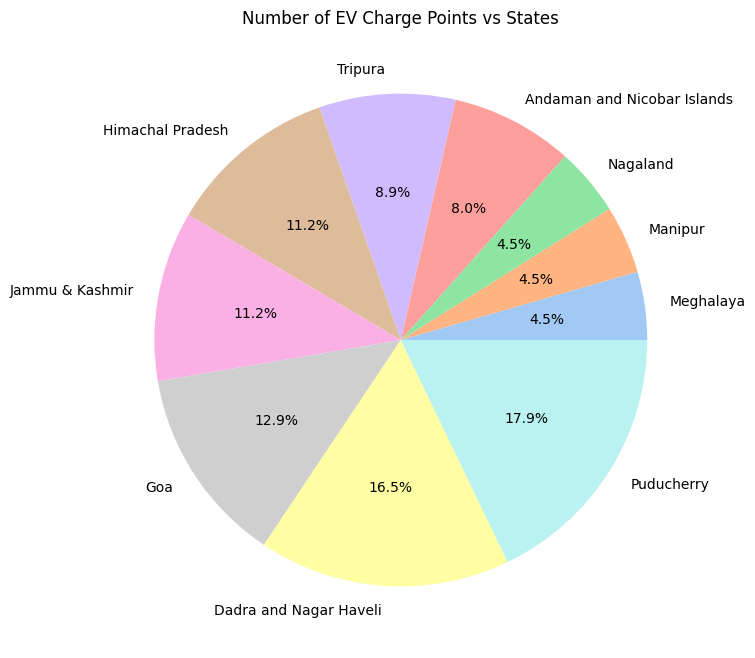

In [ ]:
top_10_charge = charge_points_per_state[:10]
plt.figure(figsize=(8,8))
plt.title("Number of EV Charge Points vs States")
plt.pie(top_10_charge["Number of Electric Vehicle Charging Sanctioned"], labels=top_10_count["State/UT-wise"],colors=colors, autopct='%1.1f%%',startangle=0)
plt.show()

# Analysis of EV data

In [ ]:
car_data = pd.read_csv("evs_car_data.csv")
car_data.head()

,Brand,AccelSec,TopSpeed_KmH,Battery_Pack Kwh,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceINR
0,0,4.6,233,70.0,161,940,0,0,0,0,0,5,4549360
1,1,10.0,160,45.0,167,250,0,1,0,1,1,5,2460000
2,2,4.7,210,75.0,181,620,0,0,0,2,0,5,4628080
3,3,6.8,180,74.0,206,560,0,1,0,3,0,5,5579280
4,4,9.5,145,28.5,168,190,0,1,0,1,2,4,2705754


In [ ]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             102 non-null    int64  
 1   AccelSec          102 non-null    float64
 2   TopSpeed_KmH      102 non-null    int64  
 3   Battery_Pack Kwh  102 non-null    float64
 4   Efficiency_WhKm   102 non-null    int64  
 5   FastCharge_KmH    102 non-null    int64  
 6   RapidCharge       102 non-null    int64  
 7   PowerTrain        102 non-null    int64  
 8   PlugType          102 non-null    int64  
 9   BodyStyle         102 non-null    int64  
 10  Segment           102 non-null    int64  
 11  Seats             102 non-null    int64  
 12  PriceINR          102 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 10.5 KB


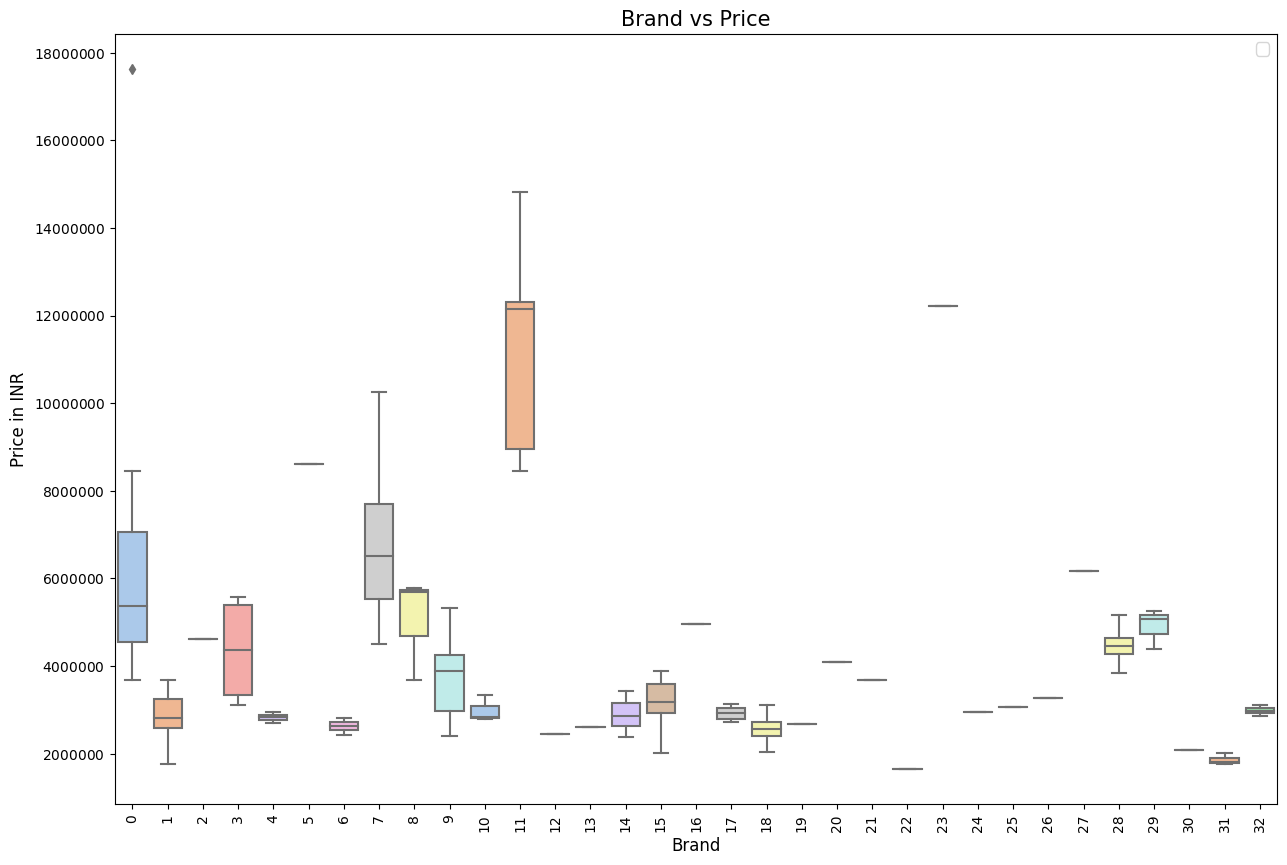

In [ ]:
import matplotlib.ticker as ticker

plt.figure(figsize=(15,10))
sns.boxplot(x="Brand", y="PriceINR",data=car_data,palette="pastel")
plt.xticks(rotation=90)
plt.title("Brand vs Price", fontsize=15)
plt.ylabel("Price in INR", fontsize=12)
plt.xlabel("Brand", fontsize=12)
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='plain', axis='y')
plt.legend(fontsize=12)
plt.show()

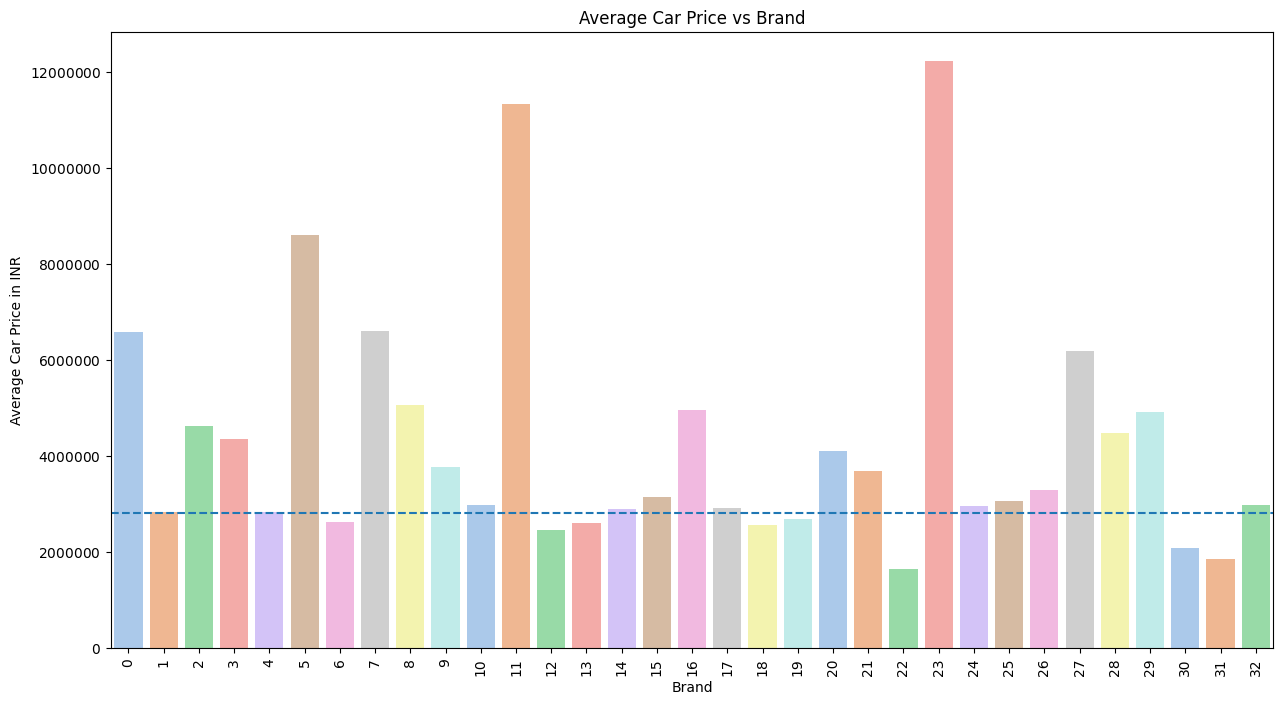

In [ ]:
import matplotlib.ticker as ticker
y = car_data.groupby(["Brand"])["PriceINR"].mean()
plt.figure(figsize=(15,8))
sns.barplot(x=y.index, y=y.values, palette="pastel")
plt.xticks(rotation=90)
plt.xlabel("Brand")
plt.ylabel("Average Car Price in INR")
plt.title("Average Car Price vs Brand")
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='plain', axis='y')
plt.axhline(car_data.PriceINR.std(), linestyle="--")
plt.show()

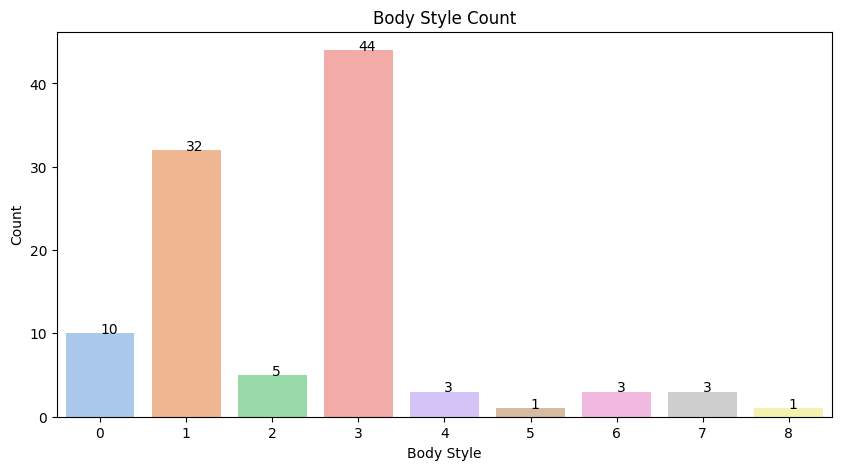

In [ ]:
y = car_data.BodyStyle.value_counts()
plt.figure(figsize=(10,5))
# y.plot(kind="bar", figsize=(10,5))
sns.barplot(x=y.index, y=y.values, palette="pastel")
plt.xticks(rotation=0)
for i in range(len(y)):
    plt.text(i,y[i],y[i])
plt.xlabel("Body Style")
plt.ylabel("Count")
plt.title("Body Style Count")
plt.show()

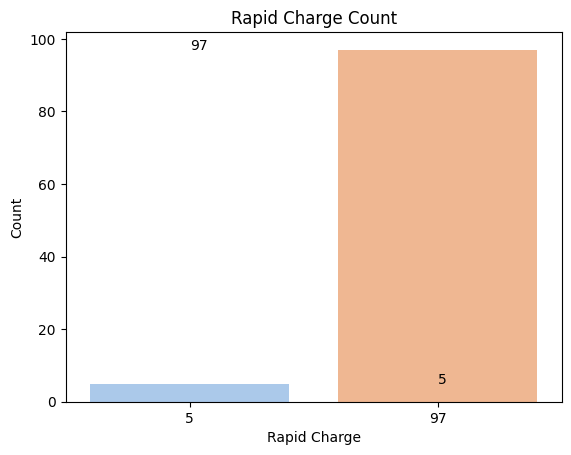

In [ ]:
y = car_data.RapidCharge.value_counts().sort_values(ascending=True)
sns.barplot(x=y.index,y=y.values,data=y, palette="pastel")
plt.xticks(rotation=0)
for i in range(len(y)):
    plt.text(i,y[i],y[i])
plt.xlabel("Rapid Charge")
plt.ylabel("Count")
plt.title("Rapid Charge Count")
plt.show()

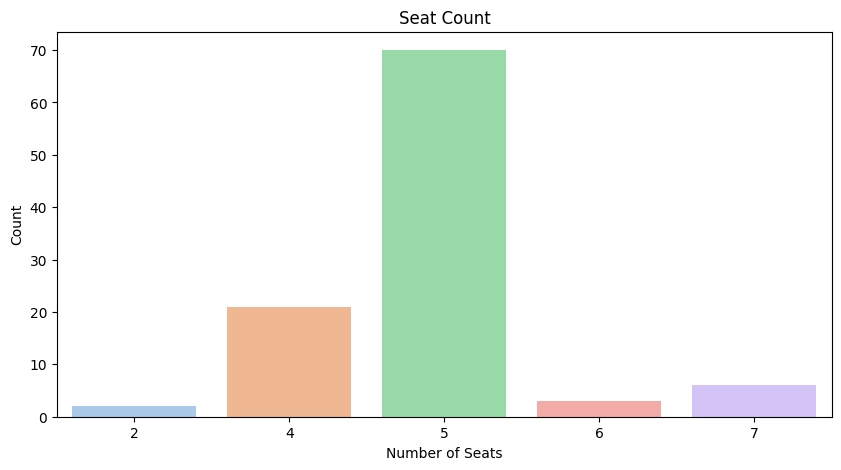

In [ ]:
y = car_data.Seats.value_counts().sort_index(ascending=True)
data_df = pd.DataFrame({'Categories': y.index, 'Values': y.values})
plt.figure(figsize=(10,5))
sns.barplot(x=data_df.Categories,y=data_df.Values, palette="pastel")
plt.xlabel("Number of Seats")
plt.ylabel("Count")
plt.title("Seat Count")
plt.show()

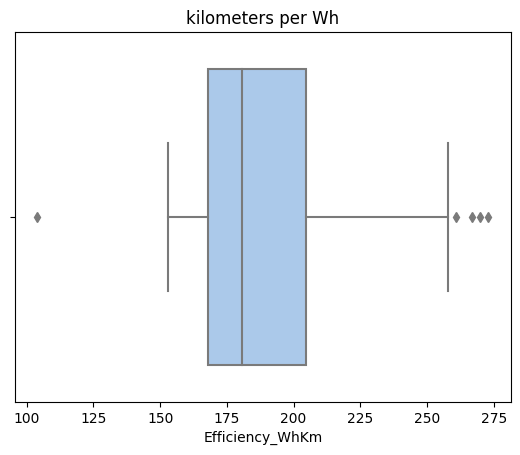

In [ ]:
sns.boxplot(x=car_data['Efficiency_WhKm'], palette="pastel")
plt.title("kilometers per Wh")
plt.show()

<Axes: >

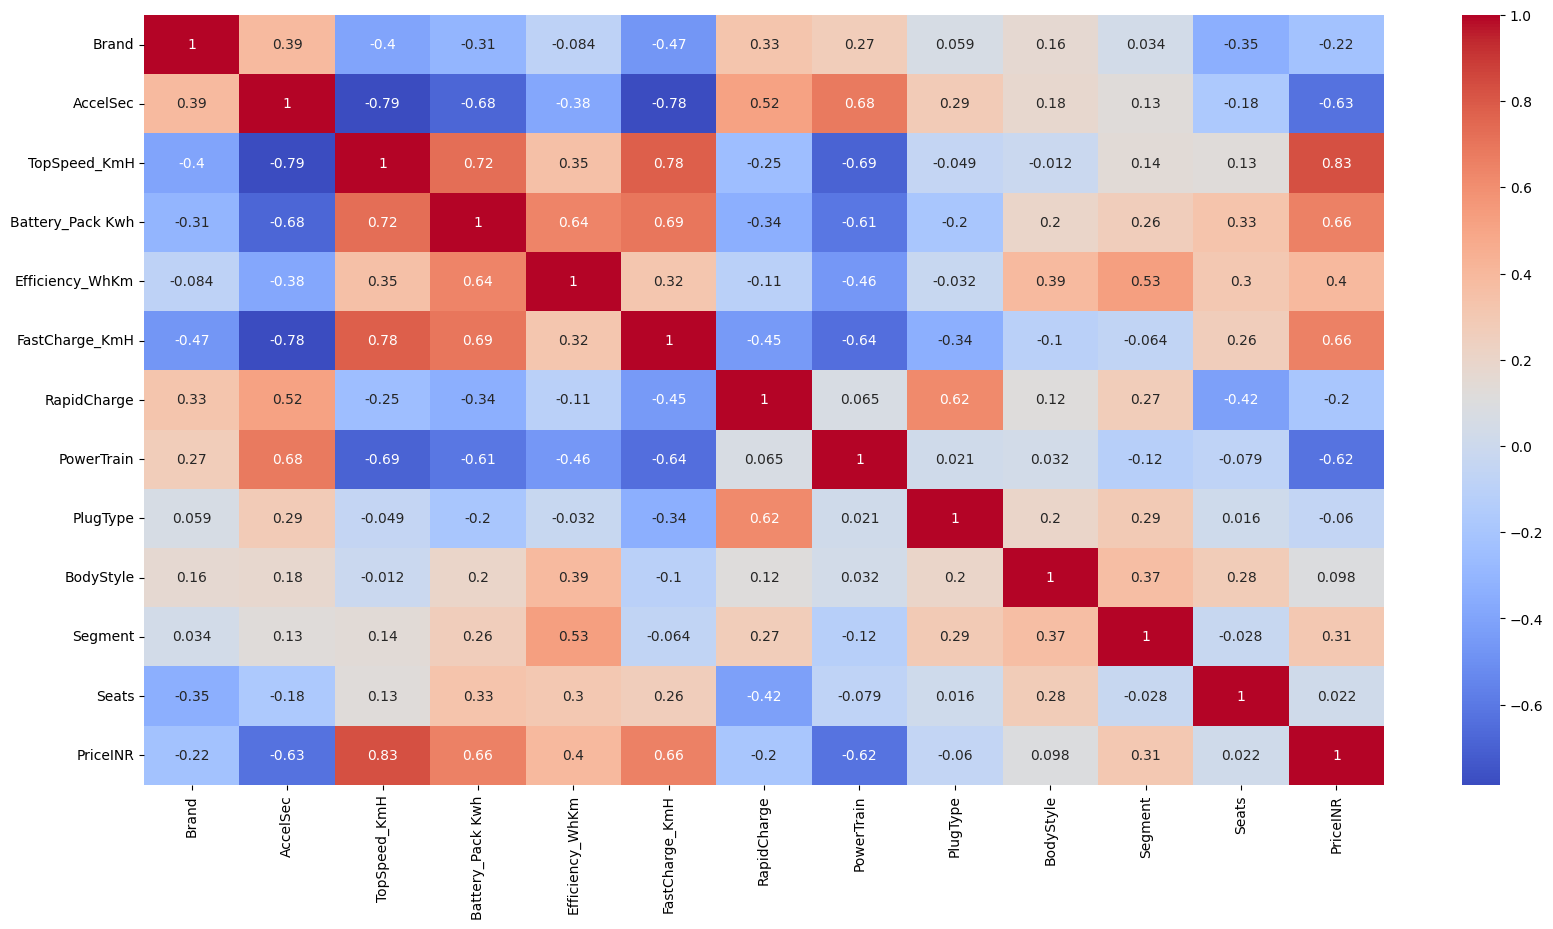

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(car_data.corr(), annot=True, cmap="coolwarm")

In [ ]:
# Maharashtra has most EV vehicles running and also has the most EV charging station available.
# As the Acceleration/Sec Decrease the pirce of the car Increase
# As the Top Speed Increase the price of the the car Increase.
# As the Battery Pack Increase the price of the car Increase.


In [ ]:
# -Most of the production is of 5 seater cars and at 2nd 4 seater cars.
# -Average Price in INR range between[Rs. 25,00,000 - Rs. 40,00,000].
# -Most of the production is of SUv AND Hatchback BodyStyle vechicles.
# -Most of the production is with the  Rapid Charge Feature.
# -Average Efficency ranges from [160-200] Whkm.